## Heart disease database prediction using machine learning

The following notebook is a sample project used for analysis and visualization of the H-D database using different
methods from ML.

The process:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experimentation

## 1. Problem Definition
Given data on patients attributes and health situation to predict if a person has a heart disease or not.

## 2. Data
The data is provided in open source on kaggle.

## 3. Evaluation
we need to try to reach 90% to 95% accuracy to predict if a person has a heart disease or not using ML and the patients
attributes.

## 4. Features
Are available on the data in the dataframe or you can check them on kaggle

1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type

    -- Value 1: typical angina.
    
    -- Value 2: atypical angina.
    
    -- Value 3: non-anginal pain.
    
    -- Value 4: asymptomatic.
    
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results

    -- Value 0: normal.
    
    -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV).
    
    -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria.
    
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. slope: the slope of the peak exercise ST segment

    -- Value 1: upsloping.
    
    -- Value 2: flat.
    
    -- Value 3: downsloping.
    
11. rldv5: height at rest
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. num: diagnosis of heart disease (angiographic disease status)

    -- Value 0: < 50% diameter narrowing.
    
    -- Value 1: > 50% diameter narrowing.

In [53]:
## Tools required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import RocCurveDisplay

In [2]:
#load data into a dataframe
data = pd.read_csv("heart-disease (1).csv")
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data exploration (EDA)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


from this description we can say :

1. There are no missing data.
2. we have 14 attributes
3. data types are numerical, having "catigorical numeric data (sex, target(yes/no))"

In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
data["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

According to the data provided 1 = Male, 0 = Female

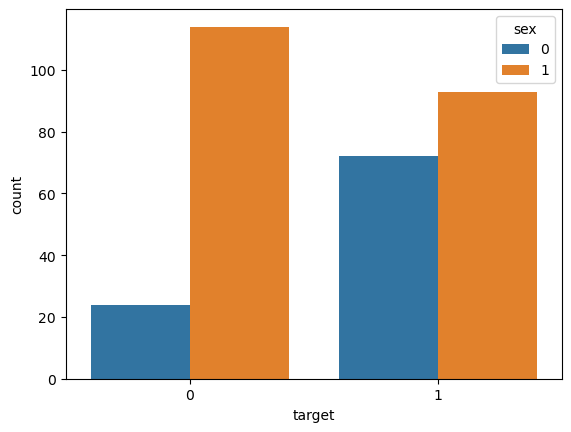

In [21]:
sns.countplot(data=data, x="target", hue="sex");

According to the data in "target" attribute 0 is not having heart disease and 1 is having heart disease.

This graph shows the difference in genders who may and may not have heart disease

In [7]:
data["ca"].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

5 different heart major vassels with 0 being the highest affected

<Axes: xlabel='ca', ylabel='count'>

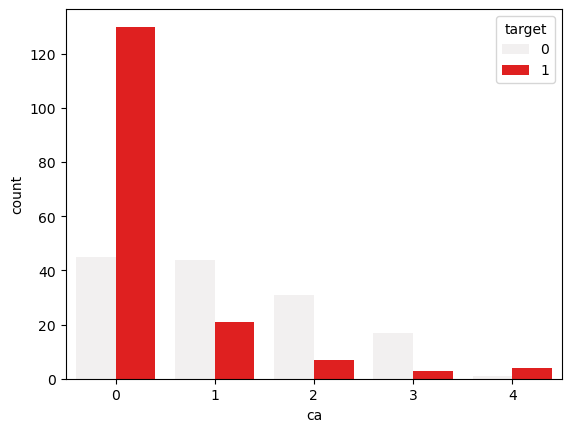

In [8]:
sns.countplot(data=data, x="ca", hue="target", color="red")

people with a problem with the major heart vessel 0 are more likely to have a heart disease

In [9]:
data["cp"].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

4 level of chest pain with 0 being the highest count (lowest value of chest pain)

<Axes: xlabel='cp', ylabel='count'>

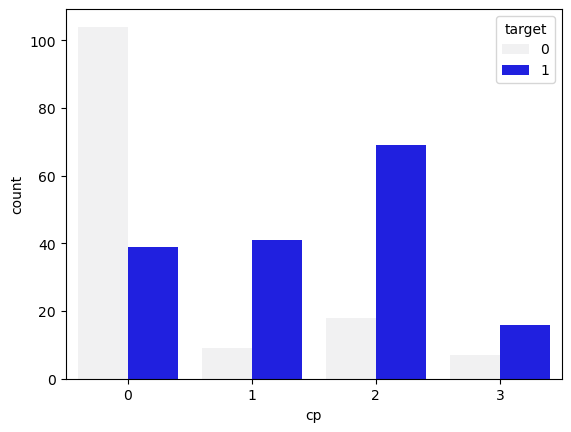

In [10]:
sns.countplot(data=data, x="cp", hue="target", color="blue")

This graph shows people who experience chest pain are more likely to have a heart disease.

0 value of chest pain shows lower appearence of having a heart disease

In [11]:
data["age"].value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64

<Axes: xlabel='age', ylabel='count'>

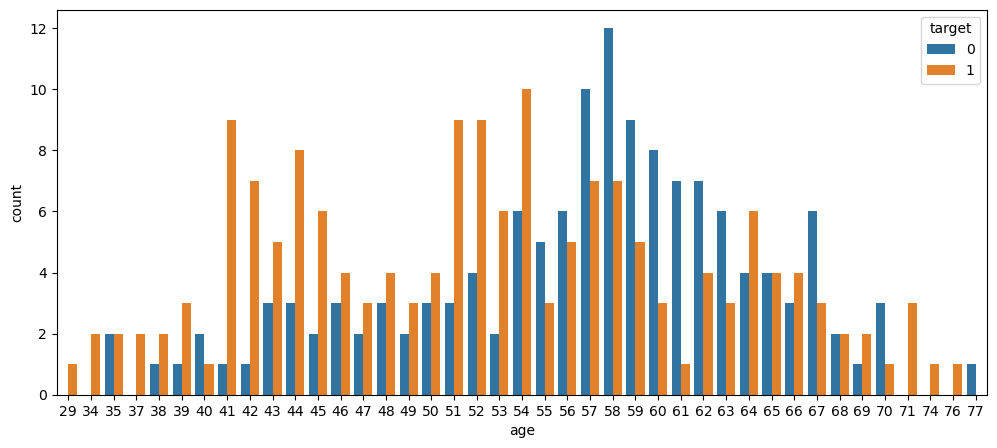

In [12]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.countplot(data=data, x="age", hue="target", ax=ax)

The graph above shows the age of people in comparison to having or not having a heart disease.

It seems that younger people tend to have a heart disease more then older people.

This may be because younger people tend to be smokers thus having chest pain and may lead to having heart disease. (that is my personal interpretation)

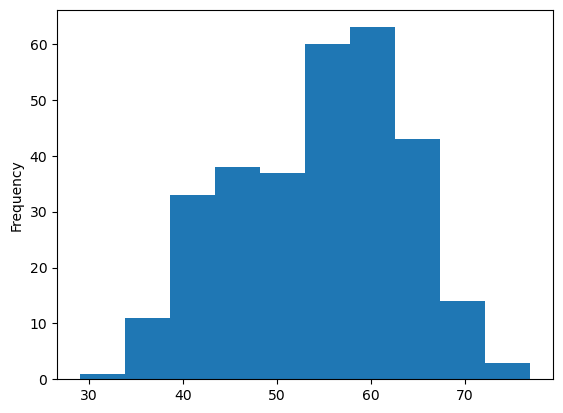

In [30]:
#lets check the age distribution
data.age.plot.hist();

Seems like a very close to the normal distribution bell shape curve shifted to the left a bit

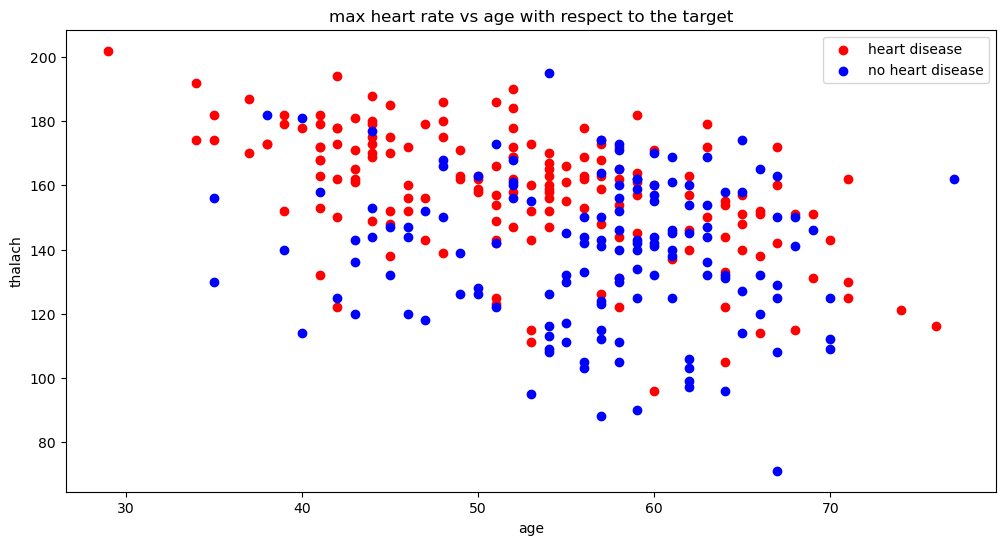

In [29]:
plt.figure(figsize=(12,6))

plt.scatter(data.age[data.target==1],
            data.thalach[data.target==1],
            c="red")

plt.scatter(data.age[data.target==0],
            data.thalach[data.target==0],
            c="blue")

plt.title("max heart rate vs age with respect to the target")
plt.xlabel("age")
plt.ylabel("thalach")
plt.legend(["heart disease","no heart disease"]);

According to the figure above we can see the max heart rate to age difference with respect to patient that have or not having a heart disease

In [34]:
data_corr = data.corr()

<Axes: >

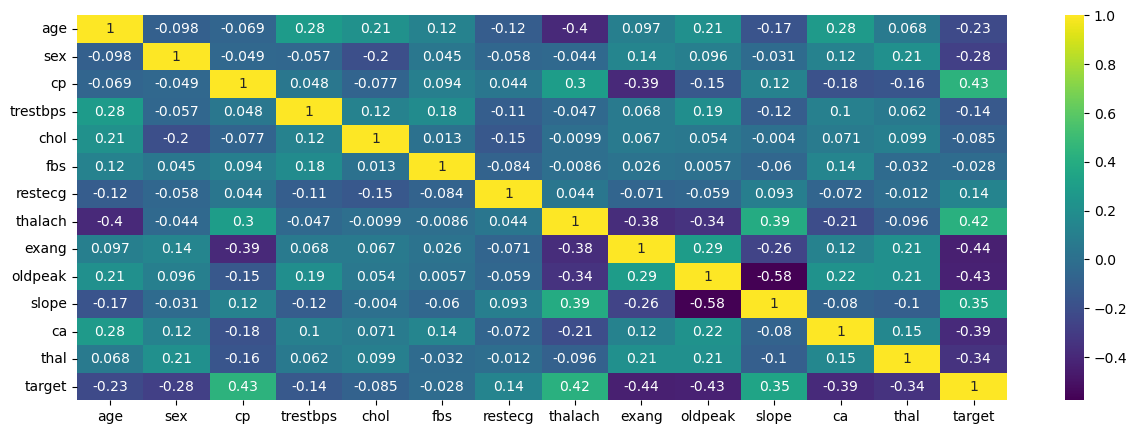

In [36]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(data=data_corr, annot=True, cmap="viridis",ax=ax )

In [37]:
data["exang"].value_counts()

0    204
1     99
Name: exang, dtype: int64

According to our data exercise induced angina which means if a person sufers from chest pain while exercising.

0 = no
1 = yes

lets see the relation of this with our heart disease

<Axes: xlabel='exang', ylabel='count'>

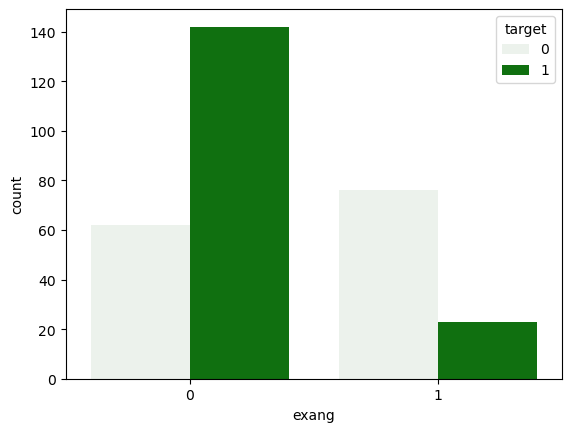

In [38]:
sns.countplot(data=data, x="exang", hue="target", color="green")

In this figure above we can see that if a person suffers from angina while exercising they highly wont have heart disease issues. On the other hand, if a person does not experience angina while exercising they might have a heart disease issue from something else.

## Modeling and preparing the data for machine learning

In [45]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


I'll start by making a function that evaluates our models

In [48]:
  def evaluate(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"F1 score: {f1 * 100:.2f}%")

    return metric_dict

In [49]:
# spliting the data
X = data.drop("target", axis=1)
y = data["target"]

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
#fitting data to the LR
lr = LogisticRegression(max_iter=306, solver="liblinear")

lr.fit(X_train,y_train)

#predict the new data
lr_pred = lr.predict(X_test)

#evaluate model
evaluate(y_test, lr_pred);

Acc: 86.89%
Precision: 87.50%
Recall: 87.50%
F1 score: 87.50%


In [63]:
#fitting the data to KNN
kn = KNeighborsClassifier(n_neighbors=10)

kn.fit(X_train,y_train)

#predict the new data
kn_pred = kn.predict(X_test)

#evaluate model
evaluate(y_test, kn_pred);

Acc: 70.49%
Precision: 73.33%
Recall: 68.75%
F1 score: 70.97%


In [61]:
#fiting the data in RFC
clf = RandomForestClassifier()

clf.fit(X_train,y_train)

#predict the new data
clf_pred = clf.predict(X_test)

#evaluate model
evaluate(y_test, clf_pred);

Acc: 83.61%
Precision: 84.38%
Recall: 84.38%
F1 score: 84.38%


In [81]:
cross_acc = cross_val_score(lr, X, y, cv=10, scoring="accuracy")

In [82]:
print(f"the cross-val acc is: {max(cross_acc)*100:.2f}%")

the cross-val acc is: 90.00%


 let's do some hyperparameter tunning to our victorious model LogisticsRegressor using randomisedsearchCV

In [69]:
lr.get_params

<bound method BaseEstimator.get_params of LogisticRegression(max_iter=306, solver='liblinear')>

In [102]:
 grid = {
     "C" : np.logspace(-4, 4, 20),
     "max_iter" : [300, 400, 200, 200, 100],
     "solver" : ["liblinear"],
     "penalty" : ['l1', 'l2']
 }

In [103]:
rs_lr = RandomizedSearchCV(estimator=lr,
                            param_distributions=grid,
                            n_iter=20, # number of models to try
                            cv=5,
                            verbose=True)
#fit the model
rs_lr.fit(X_train,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [104]:
rs_lr.best_params_

{'solver': 'liblinear',
 'penalty': 'l2',
 'max_iter': 400,
 'C': 1.623776739188721}

In [105]:
rs_y_pred = rs_lr.predict(X_test)

rs_metrics = evaluate(y_test,rs_y_pred)

Acc: 86.89%
Precision: 87.50%
Recall: 87.50%
F1 score: 87.50%


seems like it did the same as first time lets chheck if we can tune thhe randomforest model

In [108]:
rf_grid = {
    "n_estimators" : np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf" : np.arange(1, 20, 2)
}

In [109]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [110]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [112]:
rs_rf_y_pred = rs_rf.predict(X_test)

rs_rf_metrics = evaluate(y_test,rs_rf_y_pred)

Acc: 86.89%
Precision: 85.29%
Recall: 90.62%
F1 score: 87.88%


seems like Randomforestclassifier has done better from the first time but same as logisticRegressor

## Let's try GridsearchCV

since our logisticRegressor did the best between our models lets try to tune it more using gridsearch

In [113]:
 lr_grid = {
     "C" : np.logspace(-4, 4, 30),
     "max_iter" : [300, 400, 200, 200, 100],
     "solver" : ["liblinear"],
     "penalty" : ['l1', 'l2']
 }

In [115]:
lr_gs = GridSearchCV(lr,
                     param_grid=lr_grid,
                     cv=5,
                     verbose=True)
#fit the model
lr_gs.fit(X_train,y_train);

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


In [116]:
lr_gs.best_params_

{'C': 0.20433597178569418,
 'max_iter': 300,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [117]:
lr_gs_y_pred = lr_gs.predict(X_test)

lr_gs_metrics = evaluate(y_test,lr_gs_y_pred)

Acc: 88.52%
Precision: 87.88%
Recall: 90.62%
F1 score: 89.23%


Our GS tunning made logisticRegressor perform much better than the second time

## confusion matrix

In [135]:
print(confusion_matrix(y_test,lr_gs_y_pred))

[[25  4]
 [ 3 29]]


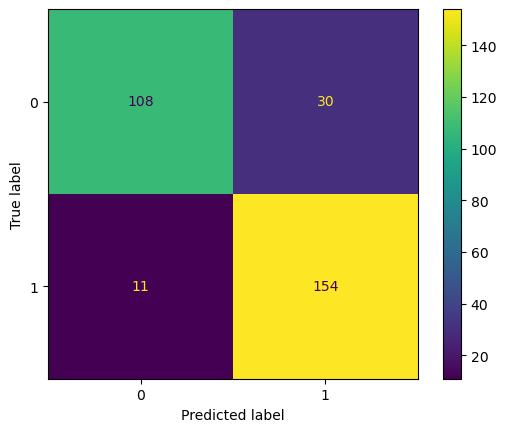

In [136]:
from sklearn.metrics import ConfusionMatrixDisplay

#confusion matrix on the original
ConfusionMatrixDisplay.from_estimator(estimator=lr_gs, X=X, y=y)

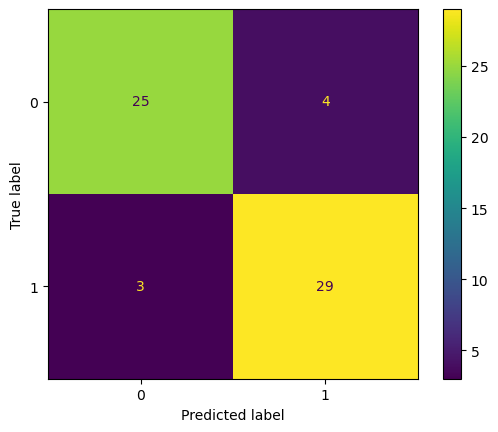

In [138]:
#confusion matrix on our model
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=lr_gs_y_pred)

## Classification report

In [145]:
print(classification_report(y_test,lr_gs_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [146]:
lr_gs.best_params_

{'C': 0.20433597178569418,
 'max_iter': 300,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [199]:
evall = evaluate(y_test,lr_gs_y_pred)

Acc: 88.52%
Precision: 87.88%
Recall: 90.62%
F1 score: 89.23%


lets display this in a table

In [205]:
cv_metrics = pd.DataFrame(evall, index=[1])
cv_metrics

,accuracy,precision,recall,f1
1,0.89,0.88,0.91,0.89


And now a graph representation

<Axes: title={'center': 'Cross-val score of the classification metrics'}>

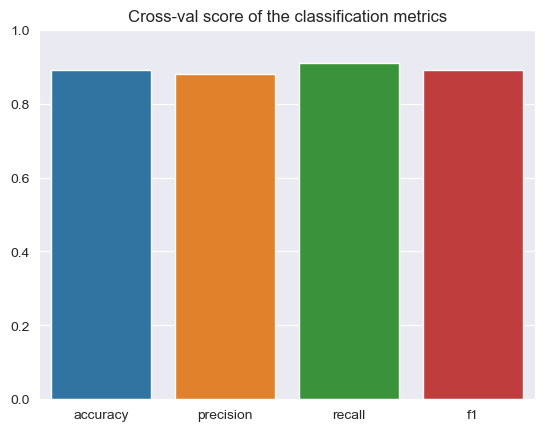

In [208]:
plt.title("Cross-val score of the classification metrics")
plt.ylim(top=1)
sns.barplot(data=cv_metrics)

### Feature Importance

which of the attributes in our Data contributed in predicting our target in our LogReg model?

In [178]:
#fit our model
clf = LogisticRegression(C=0.20433597178569418,
                         solver='liblinear',
                         max_iter=300)

clf.fit(X_train,y_train);

In [179]:
#check coef
clf.coef_

array([[ 0.00316727, -0.86044582,  0.66067073, -0.01156993, -0.00166374,
         0.04386131,  0.31275787,  0.02459361, -0.60413038, -0.56862852,
         0.45051617, -0.63609863, -0.67663375]])

In [180]:
#match coef of features to our columns
feature = dict(zip(data.columns, list(clf.coef_[0])))
feature

{'age': 0.0031672721856887734,
 'sex': -0.860445816920919,
 'cp': 0.6606707303492849,
 'trestbps': -0.011569930902919925,
 'chol': -0.001663741604035976,
 'fbs': 0.04386130751482091,
 'restecg': 0.3127578715206996,
 'thalach': 0.02459360818122666,
 'exang': -0.6041303799858143,
 'oldpeak': -0.5686285194546157,
 'slope': 0.4505161679452401,
 'ca': -0.6360986316921434,
 'thal': -0.6766337521354281}

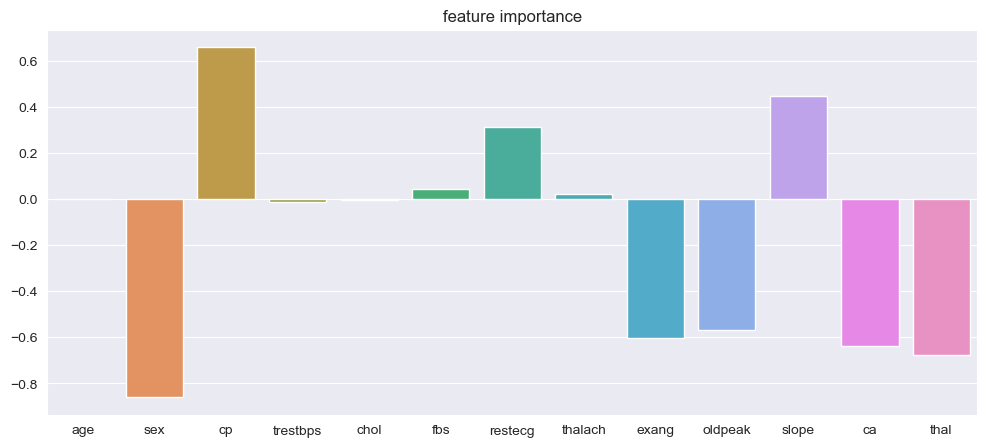

In [189]:
feature_df = pd.DataFrame(feature,index=[0])
plt.figure(figsize=(12,5))
sns.set_style("darkgrid")
sns.barplot(data=feature_df)
plt.title("feature importance");

It seems like the most important features that are related to our target are 3 main feature:
   * cp (chest pain)
   * slope (healthy/unhealthy heart rate)
   * restecg (resting electrocardiographic results)

## WE GOT VERY CLOSE TO OUR TARGET OF 90%/95% ACCURACY WITH OUR MODEL. THIS IS THE END OF THIS PROJECT ON IMPROVING MACHINE LEARNING MODELS AND VISUALISING DATA AND MAKING ANALYSIS.

This is my first ever project! please leave some comments if you think it was good and what can i improve to become better.